In [1]:
import os
os.chdir('../')
import warnings
warnings.filterwarnings(action='ignore',
    category=DeprecationWarning)

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

%matplotlib inline

In [54]:
train_wines = pd.read_csv('data/train_wines.csv', index_col='spectrum')['wine']
test_wines = pd.read_csv('data/test_wines.csv', index_col='spectrum')['wine']

In [3]:
def process_spectrums(x):
    x = x.T.iloc[4:, 300:900]
    x = x.astype(int)
    x.index = [int(s[8:]) for s in x.index]
    x.index.name = 'spectrum'
    return x

In [4]:
train_spectrums = process_spectrums(pd.read_csv('data/train_spectrums.txt'))
test_spectrums = process_spectrums(pd.read_csv('data/test_spectrums.txt'))

In [5]:
model = Pipeline([('pca', PCA(n_components=10)), ('forest', RandomForestClassifier())])
model.fit(train_spectrums, train_wines)
pred_wines = model.predict(test_spectrums)
(test_wines == pred_wines).mean()

1.0

In [6]:
joblib.dump(model, 'models/spectrum_model.pkl')

['models/spectrum_model.pkl']

In [8]:
import wine_spectrum_recognition
import imp
imp.reload(wine_spectrum_recognition)

<module 'wine_spectrum_recognition' from '/home/eugen/Documents/imagine_wine_project/wine_spectrum_recognition.py'>

In [10]:
model = wine_spectrum_recognition.WineSpectrumRecognition()

In [11]:
model.recognize_mark('data/example_spectrum_2.txt')

('Agora, Sladkoye ',
 'Color of wine: Red, with a garnet hue. Aroma and taste: the Aroma is rich, with chocolate and fruit notes. The taste is full, velvety, with a delicate sweetness in the aftertaste. Gastronomic combinations: it is Recommended to serve with fruits, desserts, pastries, ice cream. Use chilled to 16-18 °C.')

In [12]:
import matplotlib.pyplot as plt

In [74]:
spectrums = train_spectrums.append(test_spectrums).sort_index()

In [75]:
spectrums_mean = pd.DataFrame([spectrums.iloc[j:j+10].mean() for j in range(0, 70, 10)])
spectrums_std = pd.DataFrame([spectrums.iloc[j:j+10].std() for j in range(0, 70, 10)])

In [76]:
wines = train_wines.unique()[:7]

In [77]:
spectrums_mean.index = [' '.join(s.split(' ')[:2]) for s in wines]

In [78]:
wavelength = pd.read_csv('raw/wine_measurements_06_10_17.txt', sep = ' ')['Wavelength(nm)'][300:900]

In [79]:
spectrums_mean.columns = wavelength

In [80]:
spectrums_mean.columns

Float64Index([611.11, 611.67, 612.24,  612.8, 613.36, 613.92, 614.48, 615.05,
              615.61, 616.17,
              ...
              934.59, 935.14, 935.68, 936.23, 936.78, 937.32, 937.87, 938.41,
              938.96, 939.51],
             dtype='float64', name='Wavelength(nm)', length=600)

In [81]:
spectrums_mean.columns = wavelength
spectrums_mean.index.name = 'wine'
spectrums_mean.columns.name = 'wavelength'

In [82]:
spectrums_mean

wavelength               611.11  611.67  612.24  612.80  613.36  613.92  \
wine                                                                      
Chernomorskaya istina      17.1    20.9    16.7    23.8    27.7     5.8   
Krymskiy Vinnyy            37.5    27.7    31.6    31.9    39.3    26.8   
Agora, Sladkoye            23.9    11.2    15.0    24.2    13.9    24.3   
Gelendzhik krasnoye,       21.4    20.5    21.5    27.2    23.0    34.2   
Vina tamani,               24.5    13.1    25.2    31.6    28.9    34.1   
Tamanskiy pogreb,          33.2    18.5    22.2    31.5    28.1    35.3   
Krymskoye, polusladkoye    36.4    31.7    44.2    47.6    52.3    53.3   

wavelength               614.48  615.05  615.61  616.17   ...    934.59  \
wine                                                      ...             
Chernomorskaya istina      13.2    18.0    16.6    11.8   ...    1125.7   
Krymskiy Vinnyy            35.4    36.8    32.8    29.4   ...     649.8   
Agora, Sladkoye            24.4    29.0    14.4    15.7   ...    1482.5   
Gelendzhik krasnoye,       29.9    26.4    19.4    13.5   ...    1117.7   
Vina tamani,               21.8    36.8    32.6    15.4   ...    1087.9   
Tamanskiy pogreb,          27.1    34.2    23.7    16.6   ...     757.4   
Krymskoye, polusladkoye    48.6    52.7    55.0    44.2   ...     603.4   

wavelength               935.14  935.68  936.23  936.78  937.32  937.87  \
wine                                                                      
Chernomorskaya istina    1103.4  1079.1  1055.6  1020.0  1000.9   971.1   
Krymskiy Vinnyy           635.5   621.1   611.2   595.1   572.9   559.8   
Agora, Sladkoye          1458.6  1414.1  1374.2  1353.5  1312.7  1275.7   
Gelendzhik krasnoye,     1101.8  1068.1  1048.5  1022.4   996.5   962.8   
Vina tamani,             1062.0  1031.4  1005.1   989.5   956.1   924.9   
Tamanskiy pogreb,         748.9   718.4   692.4   679.4   658.3   640.8   
Krymskoye, polusladkoye   599.2   587.5   566.6   559.8   535.4   510.5   

wavelength               938.41  938.96  939.51  
wine                                             
Chernomorskaya istina     950.3   922.0   903.4  
Krymskiy Vinnyy           554.7   528.2   519.1  
Agora, Sladkoye          1241.7  1201.0  1168.7  
Gelendzhik krasnoye,      931.5   907.4   878.0  
Vina tamani,              895.7   859.8   850.9  
Tamanskiy pogreb,         626.1   610.8   585.1  
Krymskoye, polusladkoye   501.5   482.6   472.2  

[7 rows x 600 columns]

In [84]:
spectrums_mean = spectrums_mean.iloc[[0, 2, 3, 4, 5]]

In [85]:
spectrums.drop(index=np.hstack((np.arange(11, 21), np.arange(51, 61))), inplace=True)

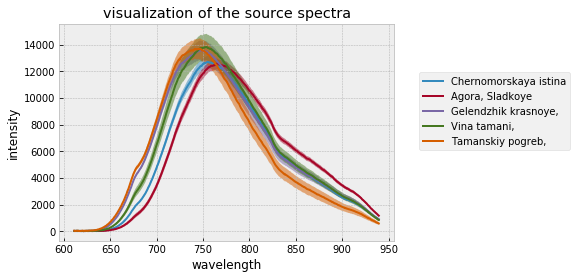

In [86]:
plt.style.use('bmh')
spectrums_mean.T.plot()
for a, b in zip(spectrums_std.values, spectrums_mean.values):
    plt.fill_between(spectrums_mean.columns, b - a, b + a, alpha=0.5)
plt.legend(loc='upper center', bbox_to_anchor=(1.3, 0.8), ncol=1)
plt.ylabel('intensity')
plt.title('visualization of the source spectra')
plt.savefig('plots/spectrums_source_wine.png', dpi=200, bbox_inches='tight')

In [87]:
pca = PCA(2)
spectrums_decomposed = pca.fit_transform(spectrums)

In [88]:
spectrums_mean

wavelength             611.11  611.67  612.24  612.80  613.36  613.92  614.48  \
wine                                                                            
Chernomorskaya istina    17.1    20.9    16.7    23.8    27.7     5.8    13.2   
Agora, Sladkoye          23.9    11.2    15.0    24.2    13.9    24.3    24.4   
Gelendzhik krasnoye,     21.4    20.5    21.5    27.2    23.0    34.2    29.9   
Vina tamani,             24.5    13.1    25.2    31.6    28.9    34.1    21.8   
Tamanskiy pogreb,        33.2    18.5    22.2    31.5    28.1    35.3    27.1   

wavelength             615.05  615.61  616.17   ...    934.59  935.14  935.68  \
wine                                            ...                             
Chernomorskaya istina    18.0    16.6    11.8   ...    1125.7  1103.4  1079.1   
Agora, Sladkoye          29.0    14.4    15.7   ...    1482.5  1458.6  1414.1   
Gelendzhik krasnoye,     26.4    19.4    13.5   ...    1117.7  1101.8  1068.1   
Vina tamani,             36.8    32.6    15.4   ...    1087.9  1062.0  1031.4   
Tamanskiy pogreb,        34.2    23.7    16.6   ...     757.4   748.9   718.4   

wavelength             936.23  936.78  937.32  937.87  938.41  938.96  939.51  
wine                                                                           
Chernomorskaya istina  1055.6  1020.0  1000.9   971.1   950.3   922.0   903.4  
Agora, Sladkoye        1374.2  1353.5  1312.7  1275.7  1241.7  1201.0  1168.7  
Gelendzhik krasnoye,   1048.5  1022.4   996.5   962.8   931.5   907.4   878.0  
Vina tamani,           1005.1   989.5   956.1   924.9   895.7   859.8   850.9  
Tamanskiy pogreb,       692.4   679.4   658.3   640.8   626.1   610.8   585.1  

[5 rows x 600 columns]

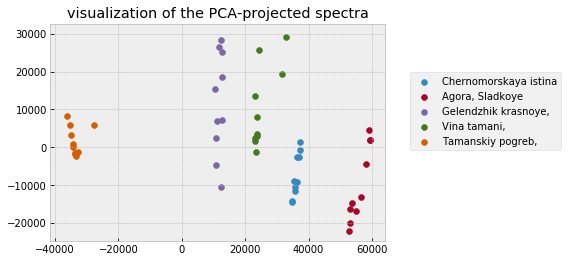

In [89]:
#plt.figure(0, (10, 6))
for j, l in zip(range(0, 80, 10), spectrums_mean.index):
    plt.scatter(spectrums_decomposed[j:j+10, 0], spectrums_decomposed[j:j+10, 1], label=l)
plt.legend(loc='upper center', bbox_to_anchor=(1.3, 0.8), ncol=1)
plt.title('visualization of the PCA-projected spectra')
plt.savefig('plots/spectrums_pca_wine.png', dpi=200, bbox_inches='tight')

In [25]:
mask = np.zeros(10, bool)
mask[:8] = True
mask = np.tile(mask, 11)

In [90]:
wines = train_wines.append(test_wines).sort_index()

In [93]:
spectrums = train_spectrums.append(test_spectrums).sort_index()

In [94]:
accuracy, f1_micro, f1_macro = list(), list(), list()
for test_size in np.linspace(0.1, 0.9, 9)[::-1]:
    train_spectrums, test_spectrums, train_wines, test_wines = (
        train_test_split(spectrums, wines, test_size=test_size, stratify=wines))

    model = Pipeline([('pca', PCA(n_components=10)), ('forest', RandomForestClassifier())])
    model.fit(train_spectrums, train_wines)
    pred_wines = model.predict(test_spectrums)
    accuracy.append((test_wines == pred_wines).mean())
    f1_micro.append(f1_score(test_wines, pred_wines, average='micro'))
    f1_macro.append(f1_score(test_wines, pred_wines, average='macro'))

In [96]:
plt.figure(0, (6, 3))
plt.style.use('bmh')
plt.plot(accuracy, label='accuracy', lw=4)
plt.plot(f1_micro, label='f1 score micro', lw=4)
plt.plot(f1_macro, label='f1 score macro', lw=4)
plt.xlabel('train sample size')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3)
plt.xticks(range(9), [str(n)[:3] for n in np.linspace(0.1, 0.9, 9)])
plt.savefig('plots/spectrum_sample_size_2.png', dpi=200, bbox_inches='tight')